In [1292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from ydata_profiling import ProfileReport   
import warnings
warnings.filterwarnings('ignore')

In [1293]:
df=pd.read_csv("salary.csv",low_memory=False)
df


AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

In [1294]:
df.columns = df.columns.str.strip()              # remove trailing spaces
df.columns = df.columns.str.lower()              # convert to lowercase
df.columns = df.columns.str.replace(" ", "_")    # replace spaces with _
df.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [1295]:
df.head()

agency                                        agency_name  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        last_name                      first_name mi  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  class_code                                        class_title  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ethnicity           gender                                    status  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

   ... hrly_rate  hrs_per_wk  monthly     annual  state_number  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   
3  ...  81.04453         4.0  1404.77   16857.24         59115        True   
4  ...   0.00000        40.0  3284.27   39411.24        165030        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   
3                     NaN                     NaN                  NaN   
4                     1.0                     NaN                  NaN   

   hide_from_search  
0               NaN  
1              True  
2               NaN  
3              True  
4               NaN  

[5 rows x 21 columns]

In [1296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   agency                   149481 non-null  int64  
 1   agency_name              149481 non-null  object 
 2   last_name                149481 non-null  object 
 3   first_name               149481 non-null  object 
 4   mi                       149481 non-null  object 
 5   class_code               149481 non-null  object 
 6   class_title              149481 non-null  object 
 7   ethnicity                149481 non-null  object 
 8   gender                   149481 non-null  object 
 9   status                   149481 non-null  object 
 10  employ_date              149481 non-null  object 
 11  hrly_rate                149481 non-null  float64
 12  hrs_per_wk               149481 non-null  float64
 13  monthly                  149481 non-null  float64
 14  annu

In [1297]:
df.describe()

agency      hrly_rate     hrs_per_wk        monthly  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288       0.346488      39.714918    4226.184248   
std       139.057691       4.211485       2.323855    2093.111691   
min       101.000000       0.000000       1.000000      50.000000   
25%       529.000000       0.000000      40.000000    3019.840000   
50%       530.000000       0.000000      40.000000    3720.170000   
75%       696.000000       0.000000      40.000000    4865.810000   
max       930.000000     117.788480      70.000000   46125.000000   

              annual  state_number  multiple_full_time_jobs  \
count  149481.000000  1.494810e+05                     14.0   
mean    50714.210973  5.651930e+05                      1.0   
std     25117.340292  4.786212e+05                      0.0   
min       600.000000  1.000000e+00                      1.0   
25%     36238.080000  1.133340e+05                      1.0   
50%     44642.040000  3.463730e+05                      1.0   
75%     58389.720000  1.100500e+06                      1.0   
max    553500.000000  1.271604e+06                      1.0   

       summed_annual_salary  
count             16.000000  
mean           74303.955000  
std            51925.944282  
min            18000.000000  
25%            32962.500000  
50%            48063.300000  
75%           123751.770000  
max           171383.400000

In [1298]:
df.isnull().sum()#checking for null values

agency                          0
agency_name                     0
last_name                       0
first_name                      0
mi                              0
class_code                      0
class_title                     0
ethnicity                       0
gender                          0
status                          0
employ_date                     0
hrly_rate                       0
hrs_per_wk                      0
monthly                         0
annual                          0
state_number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [1299]:
df=df.drop(['hide_from_search','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary'],axis=1)

In [1300]:
df=df.drop(['duplicated'],axis=1)#dropping columns due to high null values

In [1301]:
df.dtypes

agency            int64
agency_name      object
last_name        object
first_name       object
mi               object
class_code       object
class_title      object
ethnicity        object
gender           object
status           object
employ_date      object
hrly_rate       float64
hrs_per_wk      float64
monthly         float64
annual          float64
state_number      int64
dtype: object

In [1302]:
df.duplicated().sum()

0

In [1303]:
df.columns = df.columns.str.strip()              # remove trailing spaces
df.columns = df.columns.str.lower()              # convert to lowercase
df.columns = df.columns.str.replace(" ", "_")    # replace spaces with _
df.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number'],
      dtype='object')

In [1304]:
df

agency                                        agency_name  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             last_name                      first_name mi  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       class_code                                        class_title  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ethnicity           gender  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          status employ_date  hrly_rate  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

In [1305]:
df['ethnicity'].value_counts()

ethnicity
WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: count, dtype: int64

# univarient analysis

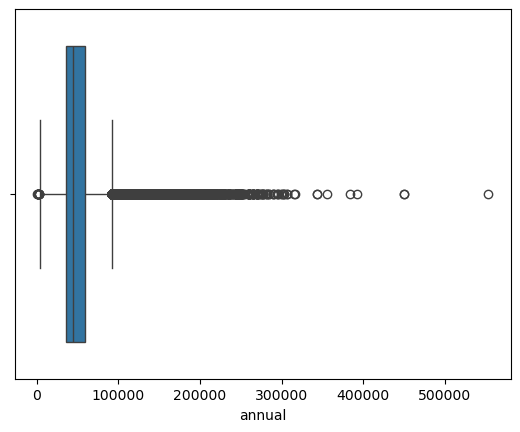

In [1307]:
sns.boxplot(x='annual',data=df)
plt.show() 

<Axes: xlabel='agency', ylabel='Count'>

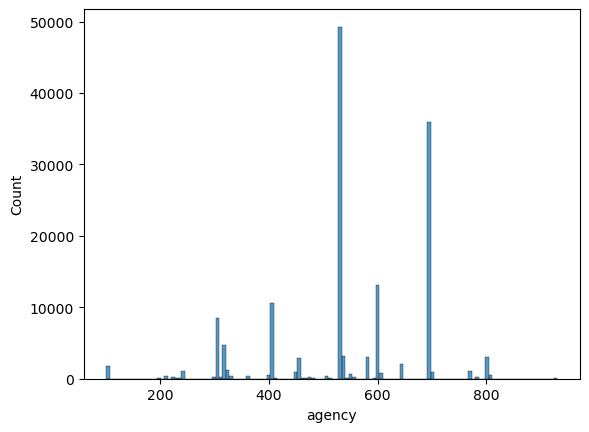

In [1308]:
sns.histplot(x='agency',data=df)

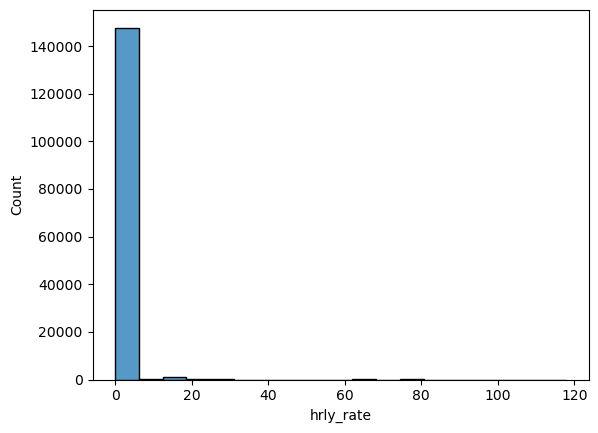

In [1309]:
sns.histplot(x='hrly_rate',data=df)
plt.title=("hourly_rate")
plt.show()

<Axes: xlabel='hrs_per_wk', ylabel='Count'>

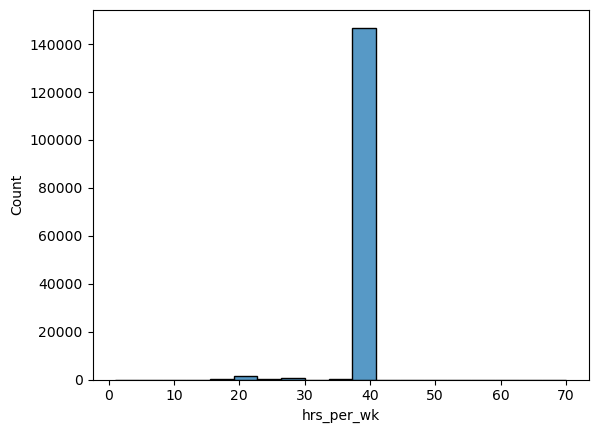

In [1310]:
sns.histplot(x='hrs_per_wk',data=df)

<Axes: xlabel='monthly', ylabel='Count'>

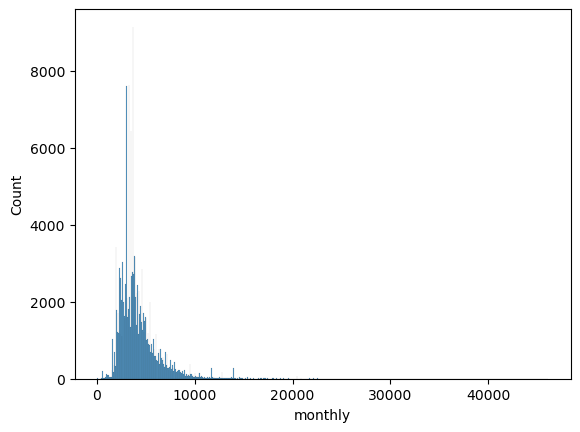

In [1311]:
sns.histplot(x='monthly',data=df)

<Axes: xlabel='annual', ylabel='Count'>

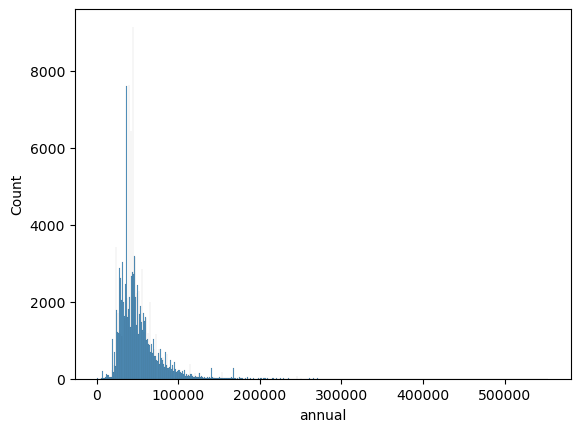

In [1312]:
sns.histplot(x='annual',data=df)

<Axes: xlabel='state_number', ylabel='Count'>

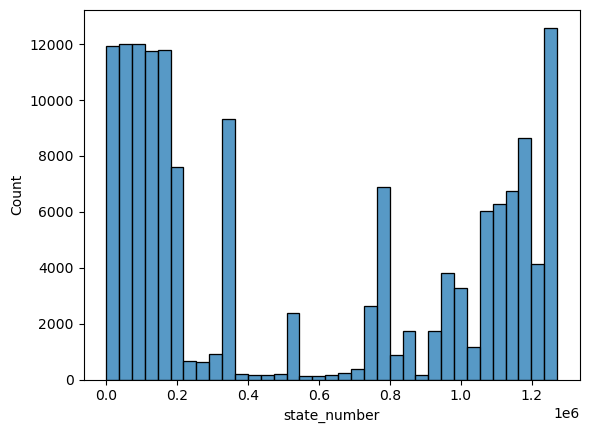

In [1313]:
sns.histplot(x='state_number',data=df)

# bivarient analysis

<Axes: xlabel='hrly_rate', ylabel='annual'>

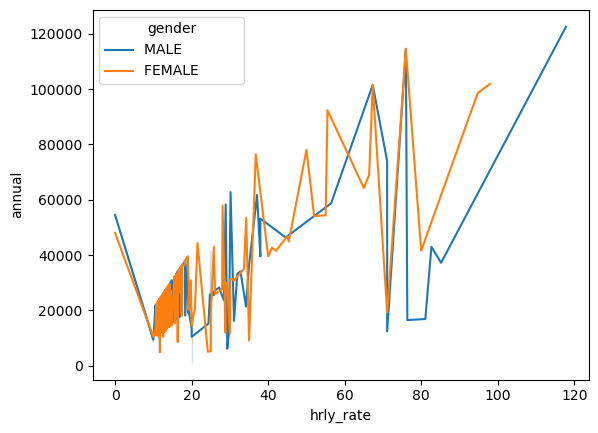

In [1315]:
sns.lineplot(x='hrly_rate',y='annual',data=df,hue='gender')

from this we knowing that if the hrly_rate is above hundred then he is a male employ and linearity between hrly_rate and annual

<Axes: xlabel='gender', ylabel='annual'>

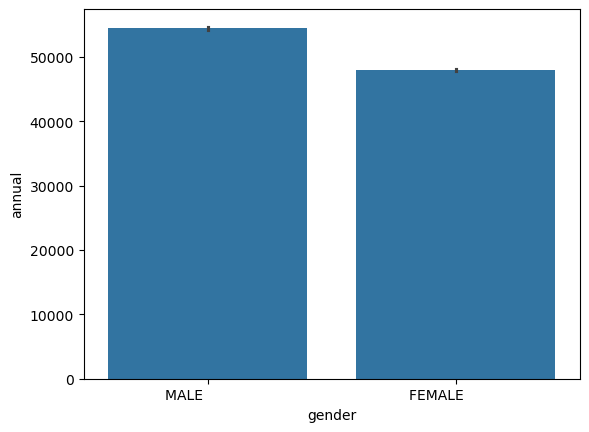

In [1317]:
 sns.barplot(x='gender',y='annual',data=df)

<Axes: xlabel='ethnicity', ylabel='annual'>

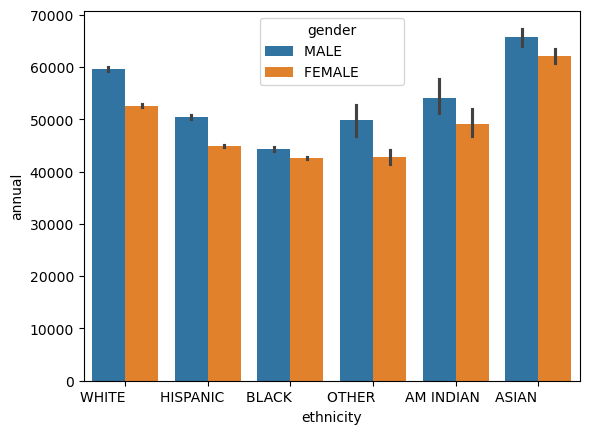

In [1318]:
sns.barplot(x='ethnicity',y='annual',hue='gender',data=df)

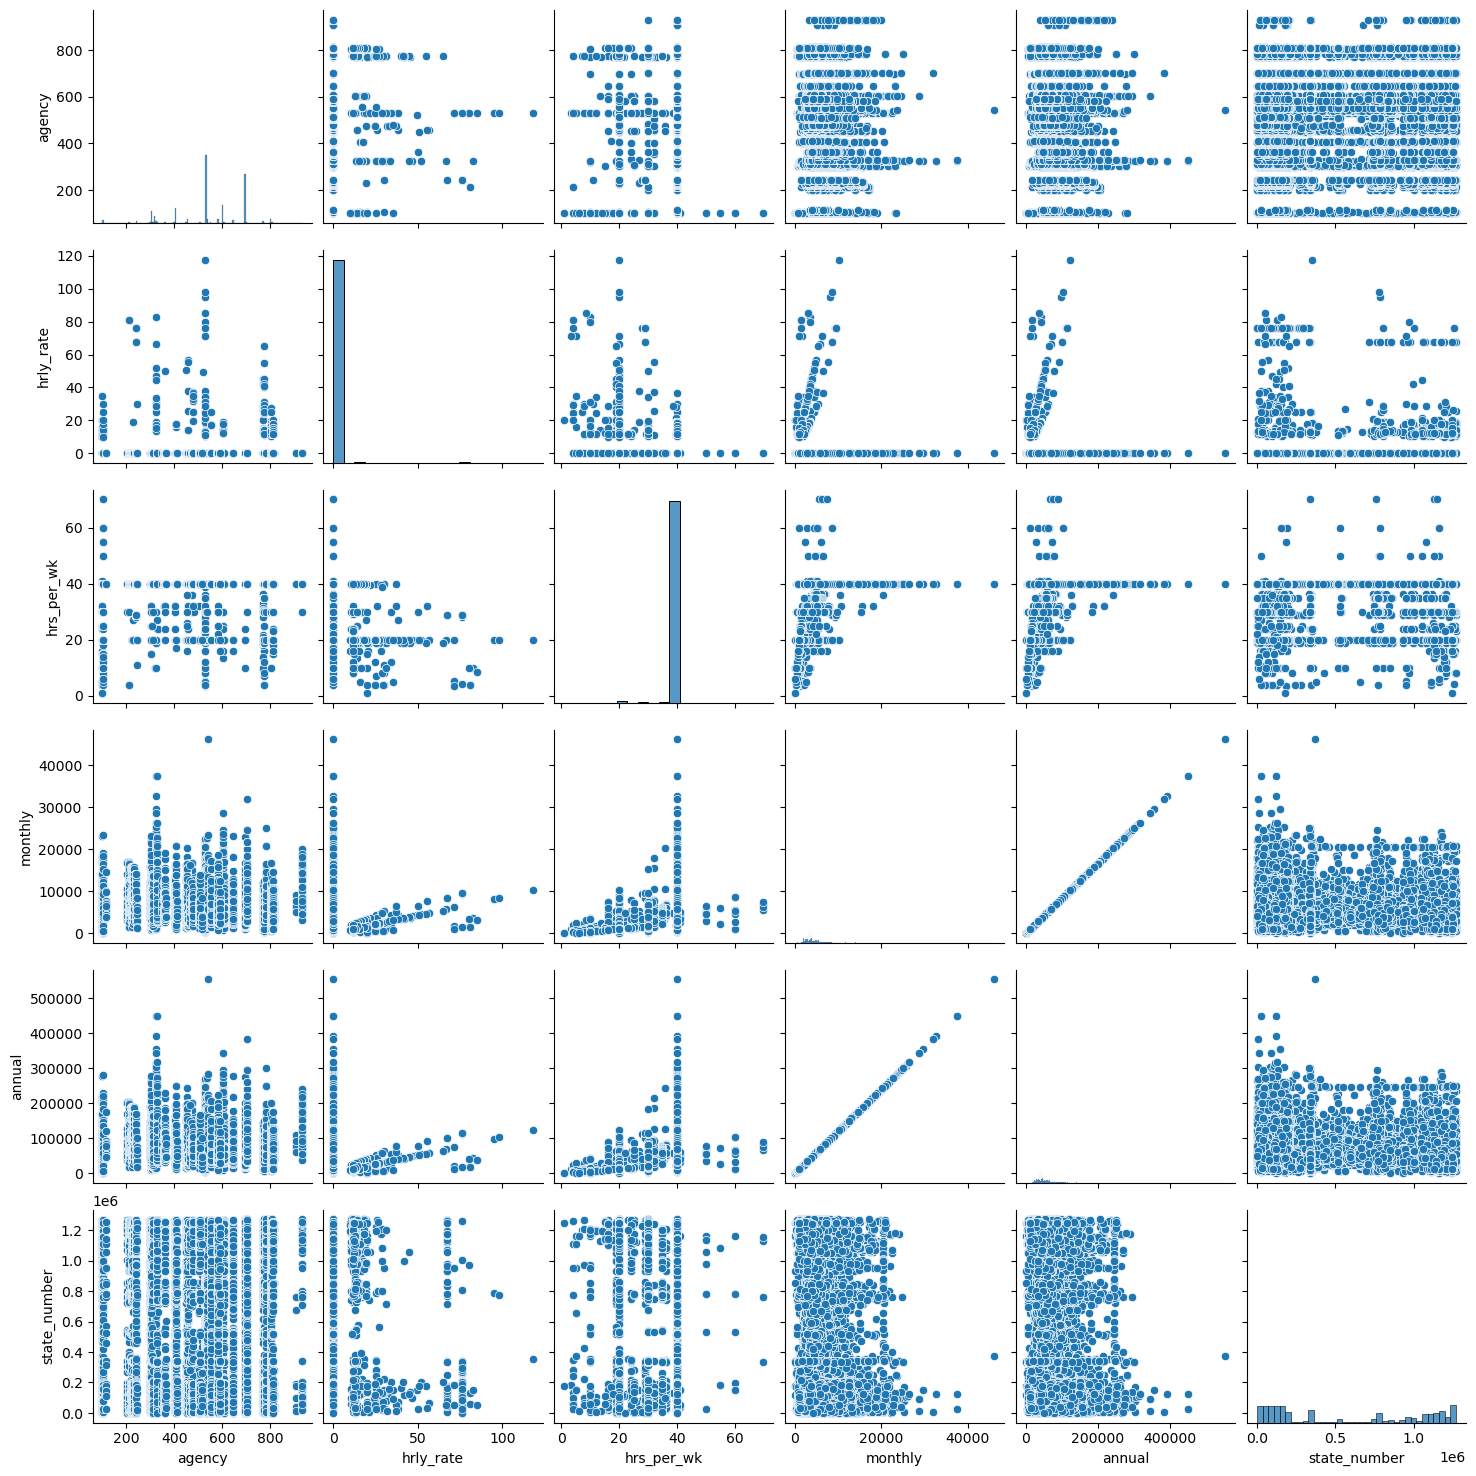

In [1319]:
sns.pairplot(data=df)

In [1320]:
tc=df.copy()
tc.drop(['agency_name','last_name','first_name','mi','class_code','class_title','ethnicity','gender','status','employ_date'],axis=1,inplace=True)
tc.corr()#correlation between attributes

agency  hrly_rate  hrs_per_wk   monthly    annual  \
agency        1.000000  -0.083653   -0.013847 -0.266452 -0.266452   
hrly_rate    -0.083653   1.000000   -0.337784  0.086291  0.086291   
hrs_per_wk   -0.013847  -0.337784    1.000000  0.096041  0.096041   
monthly      -0.266452   0.086291    0.096041  1.000000  1.000000   
annual       -0.266452   0.086291    0.096041  1.000000  1.000000   
state_number  0.060815  -0.007922   -0.010072 -0.265438 -0.265438   

              state_number  
agency            0.060815  
hrly_rate        -0.007922  
hrs_per_wk       -0.010072  
monthly          -0.265438  
annual           -0.265438  
state_number      1.000000

<Axes: >

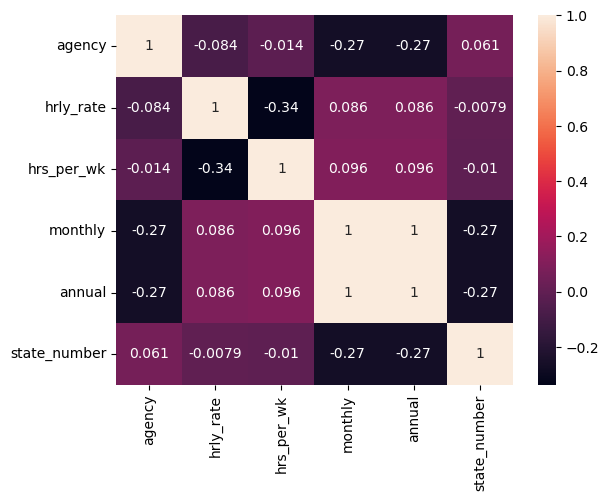

In [1321]:
sns.heatmap(tc.corr(),annot=True)#heatmap with correlation

## Task2:
#### Create a predictive model which will help theTexas state government team to know the payroll information of employees of the state of Texas.

In [1323]:
df.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number'],
      dtype='object')

In [1324]:
df['class_title'].value_counts()

class_title
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

In [1325]:
#task-3 outliers in salary
Q1 = df['annual'].quantile(0.25)
Q3 = df['annual'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df[(df['annual'] < lower_limit) | (df['annual'] > upper_limit)]
outliers.value_counts().sum()
outliers.head()


agency                                        agency_name  \
0      241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
2      241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
5      302  OFFICE OF THE ATTORNEY GENERAL                ...   
7      510  TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL     ...   
36     101  SENATE                                        ...   

                         last_name                      first_name mi  \
0   RUCKER                          MORTON                          V   
2   SPECIA JR                       JOHN                            J   
5   ROGERS                          SHAUNA                              
7   SPINKS                          DARREL                          D   
36  BARNETT                         ANNA                            P   

   class_code                                        class_title  \
0    JD25      JUDGE, RETIRED                                ...   
2    JD25      JUDGE, RETIRED                                ...   
5    1623      DIRECTOR IV                                   ...   
7    1623      DIRECTOR IV                                   ...   
36   7101      LEG. OFFICIAL/ADMINISTRATOR                   ...   

          ethnicity           gender  \
0   WHITE            MALE              
2   WHITE            MALE              
5   HISPANIC         FEMALE            
7   WHITE            MALE              
36  WHITE            FEMALE            

                                      status employ_date  hrly_rate  \
0   URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88    75.9615   
2   URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20    75.9615   
5   CRF - CLASSIFIED REGULAR FULL-TIME          04/01/20     0.0000   
7   CRF - CLASSIFIED REGULAR FULL-TIME          03/01/20     0.0000   
36  URF - UNCLASSIFIED REGULAR FULL-TIME        07/26/10     0.0000   

    hrs_per_wk   monthly     annual  state_number  
0         29.0   9545.82  114549.84        127717  
2         29.0   9545.82  114549.84         59115  
5         40.0  12899.00  154788.00       1177785  
7         40.0  10000.00  120000.00        147334  
36        40.0   8000.00   96000.00         49800

In [1326]:
from scipy.stats.mstats import winsorize#outlier handling using winsorize
trimp=0.05
df['annual']=winsorize(df['annual'],limits=trimp)

<Axes: xlabel='annual'>

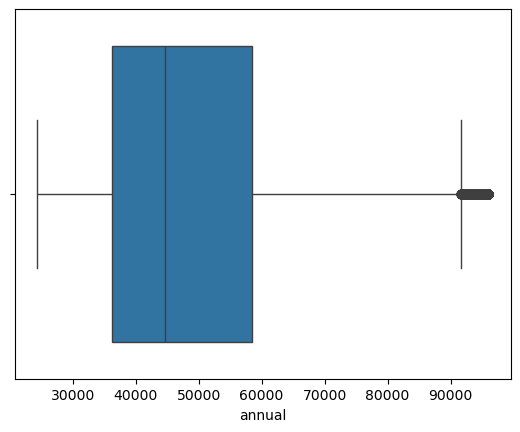

In [1327]:
sns.boxplot(x=df['annual'],data=df)

In [1328]:
df.describe(include='O')

agency_name  \
count                                              149481   
unique                                                113   
top     HEALTH AND HUMAN SERVICES COMMISSION          ...   
freq                                                36667   

                             last_name                      first_name  \
count                           149481                          149481   
unique                           38675                           23559   
top     SMITH                           MICHAEL                          
freq                              1243                            1843   

            mi class_code                                        class_title  \
count   149481     149481                                             149481   
unique      27       1481                                               1422   
top              4504      CORREC  OFFICER IV                            ...   
freq     38408       9267                                               9267   

              ethnicity           gender  \
count            149481           149481   
unique                6                2   
top     WHITE            FEMALE            
freq              67142            85328   

                                          status employ_date  
count                                     149481      149481  
unique                                        11        6295  
top     CRF - CLASSIFIED REGULAR FULL-TIME          09/01/17  
freq                                      142502       12359

In [1329]:
profile=ProfileReport(df,title="EDA",explorative=True)#profile report column wise
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1330]:
df.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number'],
      dtype='object')

In [1331]:
df.head(5)

agency                                        agency_name  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        last_name                      first_name mi  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  class_code                                        class_title  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ethnicity           gender                                    status  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  employ_date  hrly_rate  hrs_per_wk  monthly    annual  state_number  
0    02/18/88   75.96150        29.0  9545.82  96000.00        127717  
1    02/01/15   81.04454         4.0  1404.77  24375.48        127717  
2    02/01/20   75.96150        29.0  9545.82  96000.00         59115  
3    09/01/18   81.04453         4.0  1404.77  24375.48         59115  
4    06/29/20    0.00000        40.0  3284.27  39411.24        165030

In [1332]:
df=df.drop(['first_name','mi','hrly_rate','hrs_per_wk','monthly','last_name'],axis=1)

In [1333]:
df.columns.tolist()

['agency',
 'agency_name',
 'class_code',
 'class_title',
 'ethnicity',
 'gender',
 'status',
 'employ_date',
 'annual',
 'state_number']

In [1334]:
df["IsManager"] = df["class_title"].apply(lambda x: 1 if "manager" in str(x).lower() else 0)

manager_salary = df[df["IsManager"] == 1]["annual"].mean()
employee_salary = df[df["IsManager"] == 0]["annual"].mean()

print("Manager Salary Avg:", manager_salary)
print("Employee Salary Avg:", employee_salary)

Manager Salary Avg: 84737.23876923078
Employee Salary Avg: 49033.94111187428


In [1335]:
dept_disparity = df.groupby(["agency_name", "IsManager"])["annual"].mean().unstack()
dept_disparity["Difference"] = dept_disparity[1] - dept_disparity[0]
dept_disparity.sort_values("Difference", ascending=False).head()

IsManager                                                      0  \
agency_name                                                        
STATE PRESERVATION BOARD                            42147.983455   
SECRETARY OF STATE                                  51581.011844   
HEALTH AND HUMAN SERVICES COMMISSION                40795.025472   
TEXAS FACILITIES COMMISSION                         52346.824954   
SCHOOL FOR THE DEAF                                 44848.515587   

IsManager                                                      1    Difference  
agency_name                                                                     
STATE PRESERVATION BOARD                            90000.000000  47852.016545  
SECRETARY OF STATE                                  94520.580000  42939.568156  
HEALTH AND HUMAN SERVICES COMMISSION                80731.883657  39936.858185  
TEXAS FACILITIES COMMISSION                         91533.408000  39186.583046  
SCHOOL FOR THE DEAF                                 80069.280000  35220.764413

In [1336]:
from sklearn.preprocessing import LabelEncoder #converting categorical columns to numerical using label encoding
cols = ['agency_name','class_code','class_title','ethnicity','gender','status']
for col in cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])

In [1337]:
df.head()

agency  agency_name  class_code  class_title  ethnicity  gender  status  \
0     241           17        1409          711          5       1       8   
1     212           48         616          560          5       1       4   
2     241           17        1409          711          5       1       8   
3     212           48         616          560          5       1       4   
4     696           88         810          292          3       0       0   

  employ_date    annual  state_number  IsManager  
0    02/18/88  96000.00        127717          0  
1    02/01/15  24375.48        127717          0  
2    02/01/20  96000.00         59115          0  
3    09/01/18  24375.48         59115          0  
4    06/29/20  39411.24        165030          0

In [1369]:
df.head()

agency  agency_name  class_code  class_title  ethnicity  gender  status  \
0     241           17        1409          711          5       1       8   
1     212           48         616          560          5       1       4   
2     241           17        1409          711          5       1       8   
3     212           48         616          560          5       1       4   
4     696           88         810          292          3       0       0   

  employ_date    annual  state_number  IsManager  
0    02/18/88  96000.00        127717          0  
1    02/01/15  24375.48        127717          0  
2    02/01/20  96000.00         59115          0  
3    09/01/18  24375.48         59115          0  
4    06/29/20  39411.24        165030          0

In [1371]:
df['employ_date'] = pd.to_datetime(df['employ_date'], format="%m/%d/%y")

In [1373]:
df['year'] = df['employ_date'].dt.year


In [1375]:
salary_trend = df.groupby('year')['annual'].mean()
print(salary_trend)

year
1969    36390.180000
1971    86494.920000
1972    40661.280000
1973    46585.740000
1975    96000.000000
1976    83462.640000
1977    85851.411429
1978    78725.040000
1979    78081.210000
1980    80918.112000
1981    81982.171034
1982    81589.902857
1983    81015.602927
1984    73923.720000
1985    73268.665714
1986    76584.269610
1987    74276.952174
1988    79144.054884
1989    76091.003216
1990    71480.092222
1991    70707.313892
1992    65317.174873
1993    66271.227992
1994    66216.195476
1995    64273.026202
1996    61758.392810
1997    63837.682125
1998    63243.830975
1999    63225.452260
2000    60942.663573
2001    59806.566683
2002    61836.364281
2003    61829.433025
2004    55472.197475
2005    57999.132698
2006    55054.984753
2007    56848.561824
2008    53209.960297
2009    53176.091887
2010    54597.495997
2011    53031.748515
2012    53424.851699
2013    53714.436643
2014    52462.204343
2015    51412.434107
2016    51637.727760
2017    43719.041023
2018    

In [1377]:
dept_salary_trend = df.groupby(['year','agency_name'])['annual'].mean().reset_index()
print(dept_salary_trend.head(10))

   year  agency_name    annual
0  1969           42  24375.48
1  1969           88  48404.88
2  1971           28  86494.92
3  1972           91  40661.28
4  1973           42  24375.48
5  1973           91  68796.00
6  1975           17  96000.00
7  1976           16  75437.72
8  1976           17  96000.00
9  1976          100  95000.04


In [1379]:
role_salary_trend = df.groupby(['year','class_title'])['annual'].mean().reset_index()
print(role_salary_trend.head(10))


   year  class_title    annual
0  1969           77  48404.88
1  1969          441  24375.48
2  1971         1226  86494.92
3  1972           49  40661.28
4  1973          441  24375.48
5  1973         1007  68796.00
6  1975          711  96000.00
7  1976          367  95000.04
8  1976          711  96000.00
9  1976         1297  74748.00


<Axes: title={'center': 'Average Salary Over Time'}, xlabel='year'>

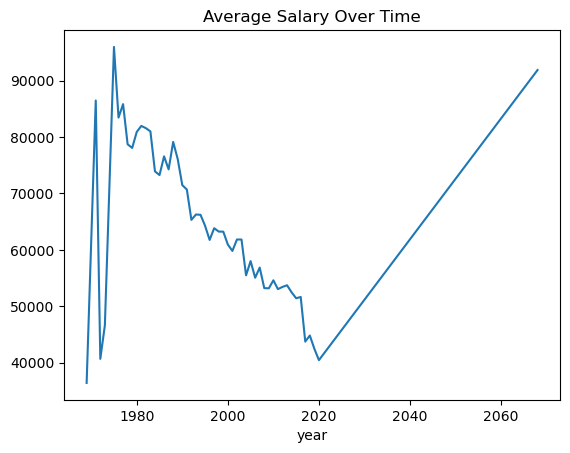

In [1381]:
salary_trend.plot(kind='line', title='Average Salary Over Time')

<Axes: title={'center': 'Salary Growth by Department'}, xlabel='year'>

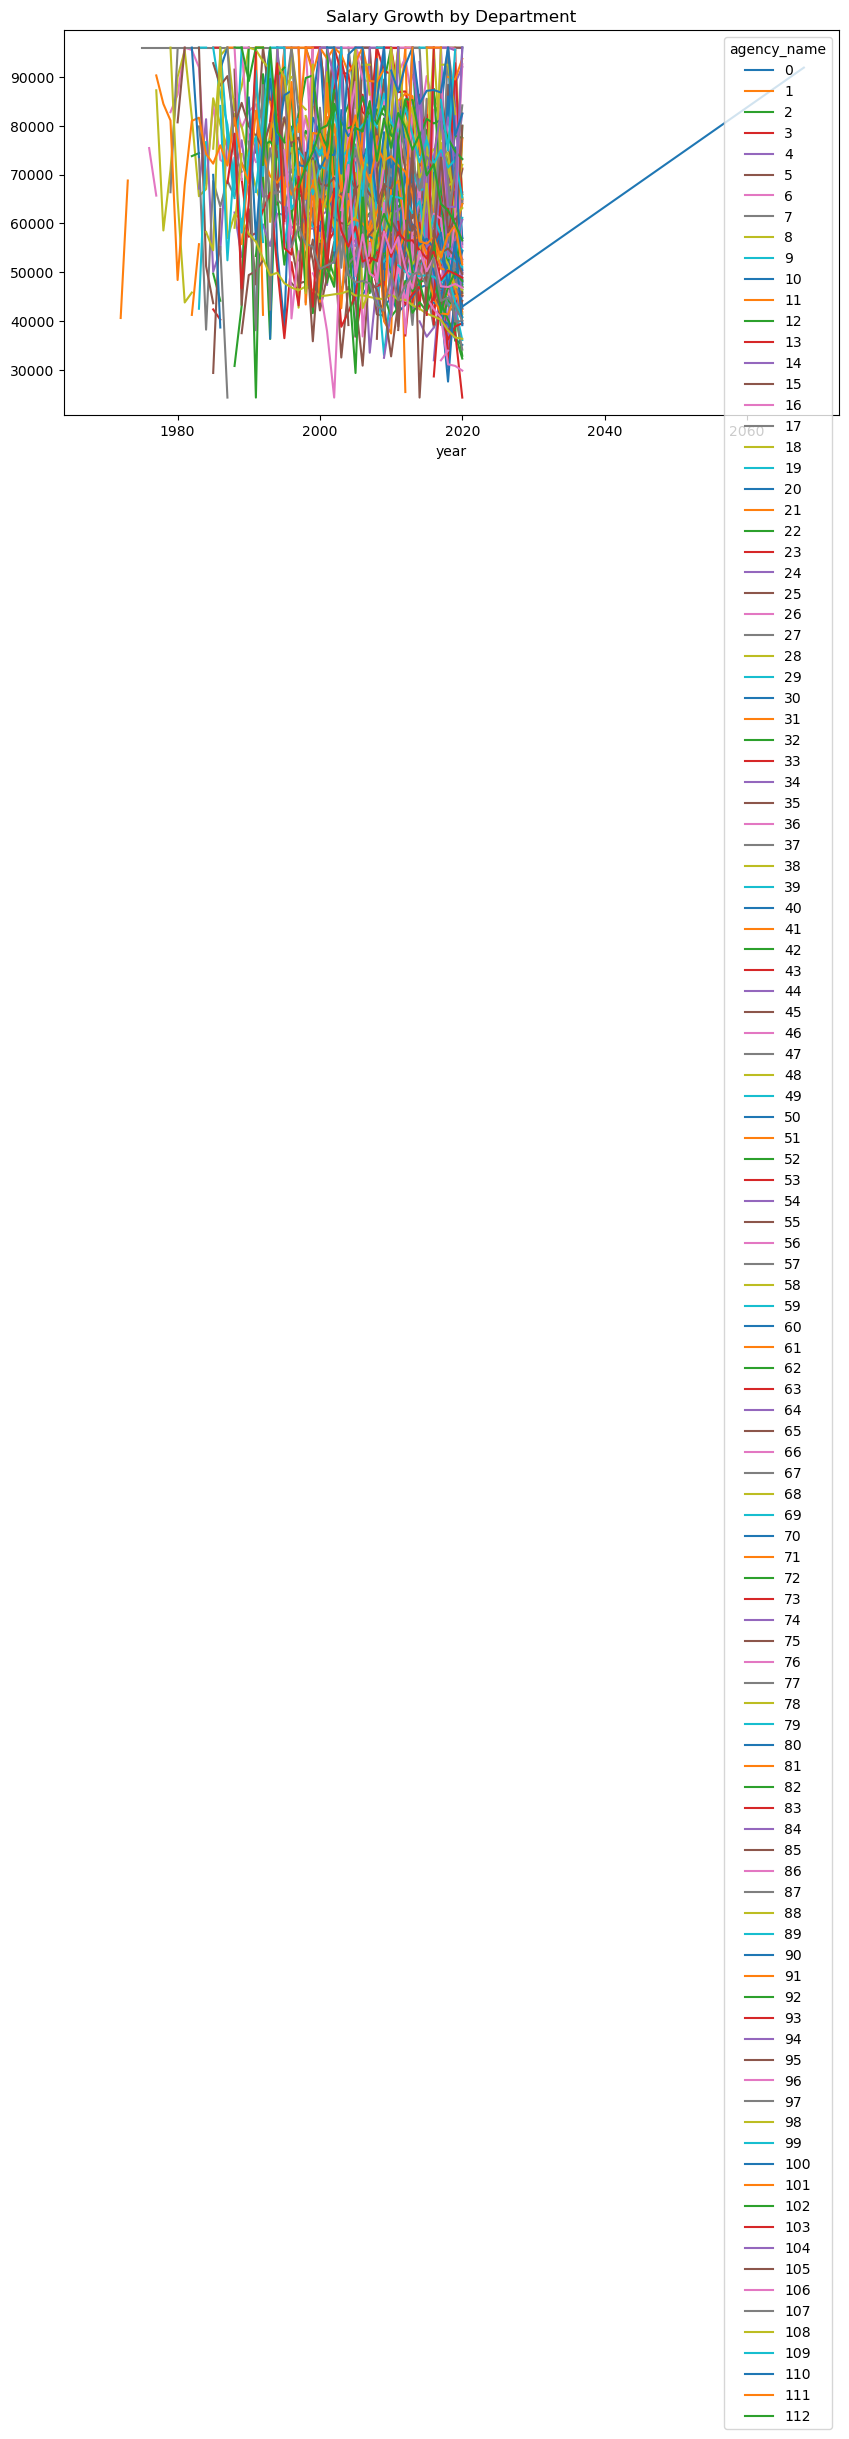

In [1383]:
dept_salary_trend.pivot(index='year', columns='agency_name', values='annual') \
                 .plot(kind='line', figsize=(10,5),
                       title='Salary Growth by Department')


<Axes: title={'center': 'Role-wise Salary Change Over Time'}, xlabel='year'>

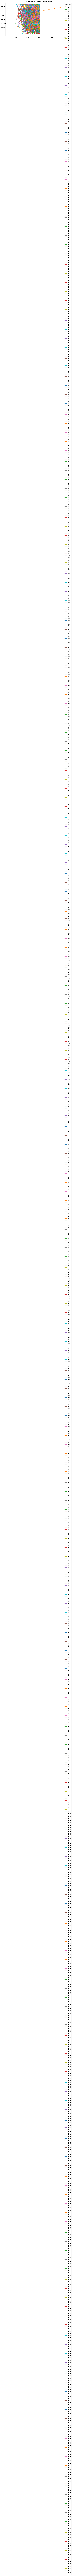

In [1385]:
role_salary_trend.pivot(index='year', columns='class_title', values='annual') \
                 .plot(kind='line', figsize=(10,5),
                       title='Role-wise Salary Change Over Time')


In [1386]:
df.head()

agency  agency_name  class_code  class_title  ethnicity  gender  status  \
0     241           17        1409          711          5       1       8   
1     212           48         616          560          5       1       4   
2     241           17        1409          711          5       1       8   
3     212           48         616          560          5       1       4   
4     696           88         810          292          3       0       0   

  employ_date    annual  state_number  IsManager  year  
0  1988-02-18  96000.00        127717          0  1988  
1  2015-02-01  24375.48        127717          0  2015  
2  2020-02-01  96000.00         59115          0  2020  
3  2018-09-01  24375.48         59115          0  2018  
4  2020-06-29  39411.24        165030          0  2020

In [ ]:
df.drop(['tenure_days','employ_date_numeric'],axis=1,inplace=True)

In [ ]:
df.drop(['employ_date'],axis=1,inplace=True)

In [1391]:
df['employ_date'] = pd.to_datetime(df['employ_date'], format="%m/%d/%y")
df['employ_date_numeric'] = df['employ_date'].map(lambda x: x.toordinal())
df['tenure_days'] = (pd.to_datetime("today") - df['employ_date']).dt.days
df['emplpoy_date']=df['tenure_days']


In [1393]:
df.columns

Index(['agency', 'agency_name', 'class_code', 'class_title', 'ethnicity',
       'gender', 'status', 'employ_date', 'annual', 'state_number',
       'IsManager', 'year', 'employ_date_numeric', 'tenure_days',
       'emplpoy_date'],
      dtype='object')

In [1395]:
X=df[['agency', 'agency_name', 'class_code', 'class_title', 'ethnicity','gender', 'status', 'state_number', 'emplpoy_date']] ## X variable contains all inputs
y=df.annual ## y is output

In [1405]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [1399]:
y_train

124815    39411.24
20383     86494.92
145145    31668.00
136477    96000.00
95275     44587.20
            ...   
115144    24375.48
142935    38400.00
129384    44642.04
120705    36076.92
115397    46073.40
Name: annual, Length: 119584, dtype: float64

In [1417]:
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [1419]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

In [1421]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1423]:
y_pred = model.predict(X_test)

In [1425]:
rmse_xgb = (mean_squared_error(y_test, y_pred))**0.5
r2_xgb = r2_score(y_test, y_pred)

print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

RMSE: 5510.055427651805
R²: 0.9146072917609833


In [1389]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [1411]:
#RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42,)
rf_model.fit(X_train,y_train)
#model prediction
y_pred=rf_model.predict(X_test)
#model evalution
mse =mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
print(f'mean squared error:{mse}')
print(f'R-squared:{r2}')

mean squared error:19075008.649935383
R-squared:0.9463495219797938


In [1413]:
#LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#model prediction
y_pred_lr = lr_model.predict(X_test)
#model evalution
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

Linear Regression Mean Squared Error: 264787624.13408506
Linear Regression R-squared: 0.25525681957284674


In [1415]:
#DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
#model prediction
y_pred_dt = dt_model.predict(X_test)
#model evalution
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

Decision Tree Mean Squared Error: 33363110.047184665
Decision Tree R-squared: 0.9061627265747917


In [1]:
def get_scores(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted")}

In [ ]:
results = []

results.append({"Model": "XGBoost", **get_scores(y_test, y_pred_xgb)})
results.append({"Model": "Decision Tree", **get_scores(y_test, y_pred_dt)})
results.append({"Model": "", **get_scores(y_test, y_pred_dt)})

results_df = pd.DataFrame(results)
print(results_df)

In [1427]:
performance_data={'model':['Random Forest Regressor','Linear Regression','XGBoost Regressor','Decision Tree Regressor'],
performance_df = pd.DataFrame(performance_data)
print("Model Performance Comparison:")
print(performance_df.to_string(index=False))

Model Performance Comparison:
                  model  Mean Squared Error (MSE)  R-squared (R2)
Random Forest Regressor              1.907501e+07        0.946350
      Linear Regression              2.647876e+08        0.255257
      XGBoost Regressor              5.510055e+03        0.914607
Decision Tree Regressor              3.336311e+07        0.906163


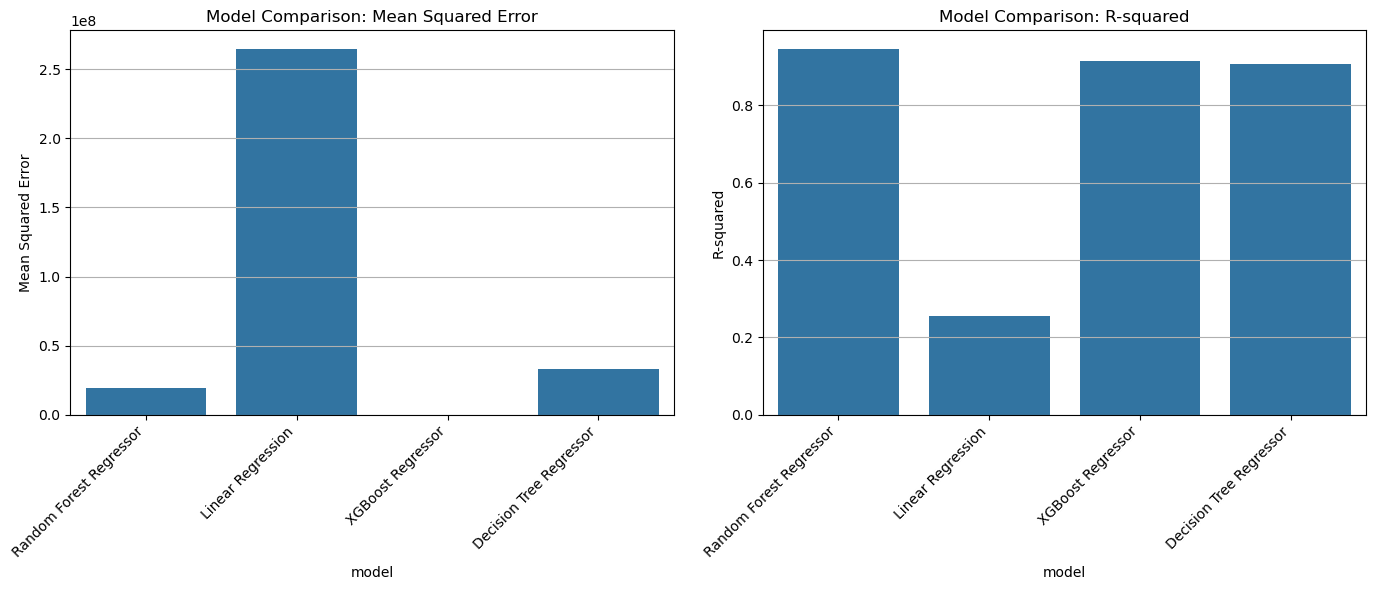

In [1439]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Bar chart for MSE
sns.barplot(x='model', y='Mean Squared Error (MSE)', data=performance_df, ax=axes[0])
axes[0].set_title('Model Comparison: Mean Squared Error')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_xticklabels(performance_df['model'], rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='-')
# Bar chart for R-squared
sns.barplot(x='model', y='R-squared (R2)', data=performance_df, ax=axes[1])
axes[1].set_title('Model Comparison: R-squared')
axes[1].set_ylabel('R-squared')
axes[1].set_xticklabels(performance_df['model'], rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='-')
plt.tight_layout()
plt.show()